## Code for analysis and plotting of scattering data
To plot scattering profiles, this code takes three input files of simulated (1 file) and experimental (2 files, high & low concentrations) scattering data. These must be formatted as three-column .dat files, in which the columns are: q, I(q), and error. The input file 'sim_fitted_out.dat' is the FoxS-calculated scattering profile after re-scaling against the low-concentration experimental dataset.

To perform dimensionless Kratky analysis, this code also loads the SAXS parameter output text files from the notebook 'guinier_analysis' (i.e., 'high_guinier_params.txt'), which should have the structure [Rg, Rg_err, I0, qmax, qmaxRg].



In [1]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats
import pandas as pd
import bioxtasraw.RAWAPI as raw

In [2]:
## import scattering profiles via raw ##

sim = raw.load_profiles('sim_fitted_out.dat')[0]
high = raw.load_profiles('SERF_1.1mM.dat')[0]
low = raw.load_profiles('SERF_0.56mM.dat')[0]

In [6]:
## assign variables to make downstream calculations & plotting easier ##

q_sim = sim.getQ()
I_sim = sim.getI()
err_sim = sim.getErr()

q_high = high.getQ()
I_high = high.getI()
err_high = high.getErr()

q_low = low.getQ()
I_low = low.getI()
err_low = low.getErr()

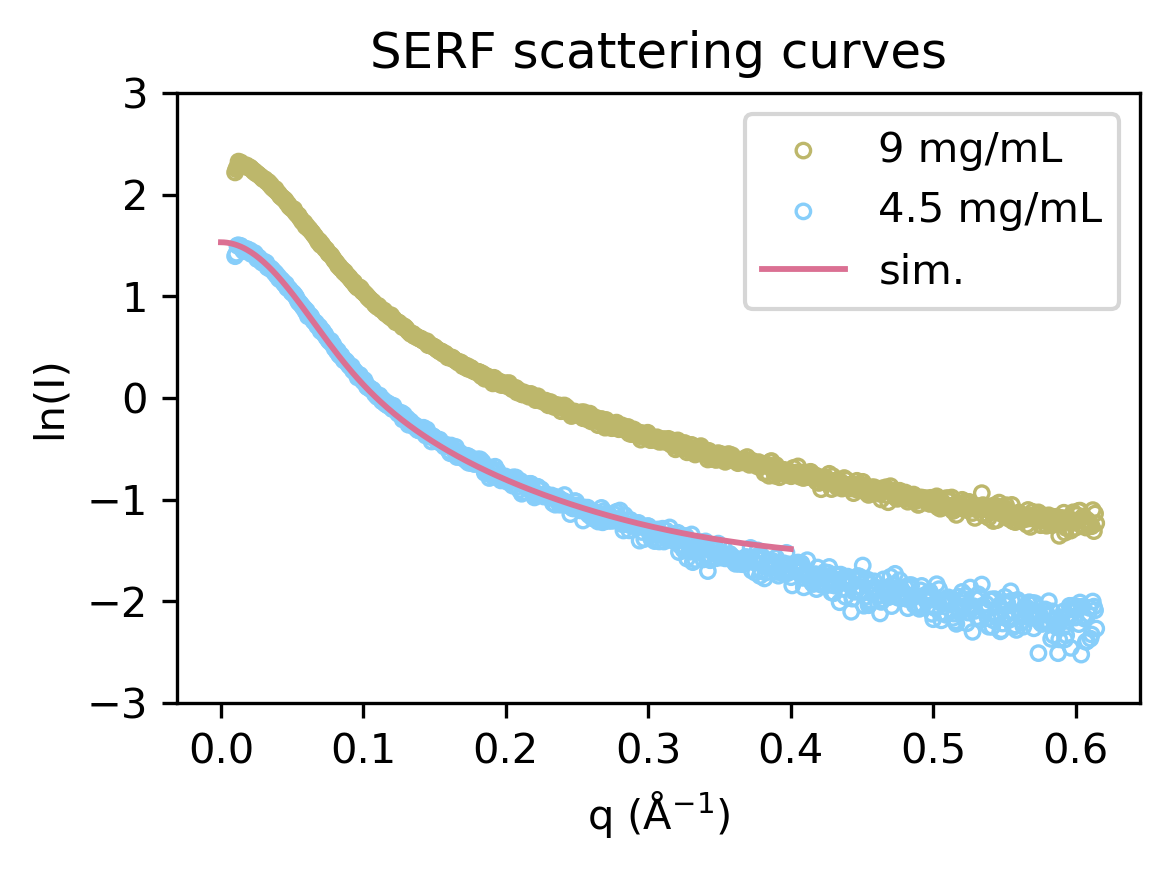

In [11]:
## plot scattering profiles (ln I(q) vs. q) ##
plt.figure(figsize = (4,3), dpi = 300)

plt.scatter(q_high, np.log(I_high), color = None, edgecolors = 'darkkhaki', s = 12, facecolor = 'None', lw = 0.8, label = '9 mg/mL')
plt.scatter(q_low, np.log(I_low) , color = None, edgecolors = 'lightskyblue', s = 12, facecolor = 'None', lw = 0.8, label = '4.5 mg/mL')
plt.plot(q_sim, np.log(I_sim), color = 'palevioletred', lw = 1.4, label = 'sim.')

plt.title('SERF scattering curves')

plt.ylabel('ln(I)')
plt.xlabel(r'q $(\mathrm{\AA}^{-1})$')

#plt.xlim(0.005, 0.38)
plt.ylim(-3, 3)
plt.legend(loc = 'best')

plt.tight_layout()

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_S2A_saxs_profiles.pdf', format = 'pdf', dpi = 300)

plt.show()

In [18]:
## load SAXS parameters (from 'guinier_analysis' notebook) for desired datasets ##

sim_params = np.loadtxt('sim_guinier_params.txt')
high_params = np.loadtxt('high_guinier_params.txt')
low_params = np.loadtxt('low_guinier_params.txt')

In [14]:
## define function to calculate independent and dependent dimensionaless Kratky variables ##

### parameters ###
# saxs_params == name of loaded saxs parameters from previous cell (i.e., sim_params) 
# q == relevant list of q values for desired dataset (i.e., q_sim)
# I == relevant list of I values for desired dataset (i.e., I_sim)

### returns dKratky 

def calc_dless_Kratky(saxs_params, q, I):
    # set variables
    Rg = saxs_params[0]
    I0 = saxs_params[2]
    qmax = saxs_params[3]
    
    # math to get dimensionless Kratky profile
    qRg = q * Rg
    
    dKrat = (qRg ** 2) * I / I0
    
    return dKrat

In [15]:
## dimensionless Kratky calculations using above function ##

sim_dKratky = calc_dless_Kratky(sim_params, q_sim, I_sim)
high_dKratky = calc_dless_Kratky(high_params, q_high, I_high)
low_dKratky = calc_dless_Kratky(low_params, q_low, I_low)

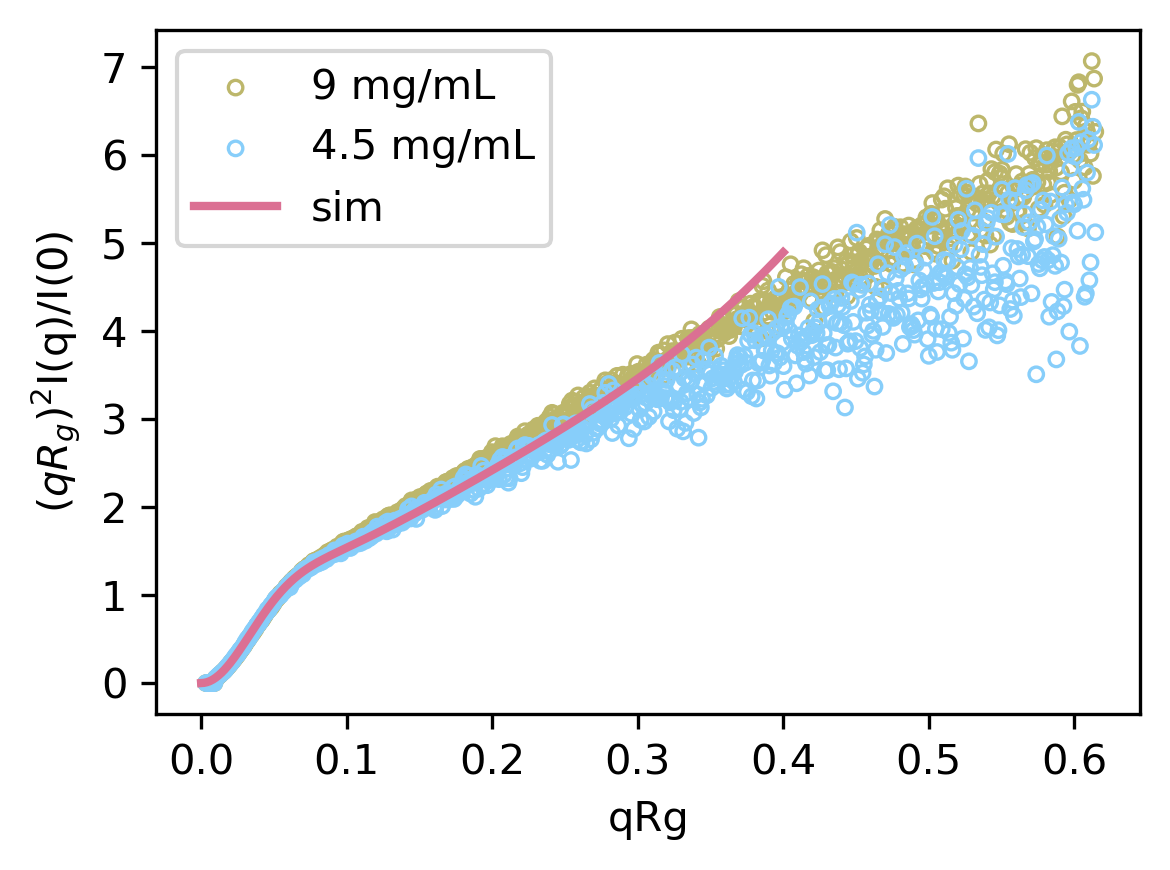

In [25]:
## plot dimensionless Kratky profiles -- generates Figure 2E ##
plt.figure(figsize = (4,3), dpi = 300)

plt.scatter(q_high, high_dKratky, color = None, edgecolors = 'darkkhaki', s = 12, facecolor = 'None', lw = 0.8, label = '9 mg/mL')
plt.scatter(q_low, low_dKratky, color = None, edgecolors = 'lightskyblue', s = 12, facecolor = 'None', lw = 0.8, label = '4.5 mg/mL')
plt.plot(q_sim, sim_dKratky, color = 'palevioletred', lw = 2, label = 'sim')

plt.ylabel(r'$(qR_g)^2$I(q)/I(0)')
plt.xlabel('qRg')

plt.legend(loc = 'best')
plt.tight_layout()

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_2E_dimensionless_Kratky.pdf', format = 'pdf', dpi = 300)
plt.show()